# TEXT EMOTION DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv("C:/Users/likit/Desktop/project_text-based/emotion_dataset_balanced.csv")

In [3]:
df.head()

,Emotion,Text
0,surprise,Decided I'm moving to Boulder Colorado.. Tessa...
1,surprise,performance with a comedian dell Arte during t...
2,disgust,My gosh zainab is tooo stupid. Ugh eastenders.
3,disgust,"SimonBorchardt I agree, shocking management ne..."
4,surprise,hehe!! U guys won't believe this NjagiKevn Cyr...


In [4]:
df['Emotion'].value_counts()

Emotion
surprise    10000
disgust     10000
neutral     10000
shame       10000
fear        10000
anger       10000
sadness     10000
joy         10000
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

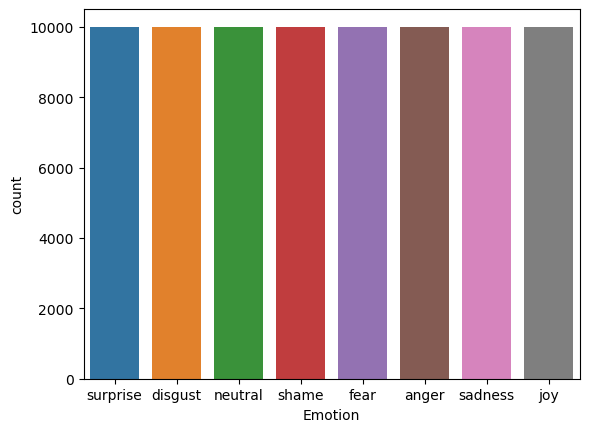

In [5]:
sns.countplot(x='Emotion',data=df)

### Data pre-processing

In [6]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [7]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [8]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [10]:
df

,Emotion,Text,Clean_Text
0,surprise,Decided I'm moving to Boulder Colorado.. Tessa...,Decided I'm moving Boulder Colorado.. TessaWood.
1,surprise,performance with a comedian dell Arte during t...,performance comedian dell Arte startup competi...
2,disgust,My gosh zainab is tooo stupid. Ugh eastenders.,gosh zainab tooo stupid. Ugh eastenders.
3,disgust,"SimonBorchardt I agree, shocking management ne...","SimonBorchardt agree, shocking management need..."
4,surprise,hehe!! U guys won't believe this NjagiKevn Cyr...,hehe!! U guys believe NjagiKevn CyrusGich dad ...
...,...,...,...
79995,neutral,No problem .,problem .
79996,anger,It doesn't look good at all .,look good .
79997,disgust,Lol when people like one We the Kings song and...,Lol people like Kings song quot;IN LOVEEEquot;...
79998,neutral,What,


### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [11]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Training the model

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

C:\Users\likit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.871875

In [18]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10,probability=True))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.921125

In [19]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.886875

### Saving the model

In [20]:
import joblib

# Open the file in write-binary mode
pipeline_file = open("svm_model1.pkl", "wb")

# Save the trained pipeline
joblib.dump(pipe_svm, pipeline_file)

# Close the file
pipeline_file.close()

print("Model saved successfully and file closed!")


Model saved successfully and file closed!


In [40]:
import sklearn
print(sklearn.__version__)

1.2.1


In [41]:
import numpy
import sklearn

print("NumPy Version:", numpy.__version__)
print("Scikit-learn Version:", sklearn.__version__)

NumPy Version: 1.23.5
Scikit-learn Version: 1.2.1
